# BECKER'S THEORY

Преступность можно рассматривать как специфичный рынок, на котором существует спрос и предложение. Предложение определяется готовностью преступников совершать правонарушений и зависит от каких факторов, как строгое наказание или легальных альтернатив заработка. Спрос формируется из потребности людей в результатах нелегальной деятельности, например, спрос на наркотики или краденое имущество.
  
Из концепция Беккера следует, что на уровень преступности влияют **размеры среднего заработка** и **уровень безработицы**. 
  
Проверим, работает ли теория Беккера на данных по регионам России.

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

## 1. Baseline

Данные по преступности, безработице и доходности населения возьмем с сайта по статистике по России https://russia.duck.consulting/

Построим и проверим модель, которая строит зависимость уровня преступности от уровня безработицы и доходов граждан России.

За основные показатели преступности возьмем количество краж, грабежей, разбоев и экономических преступлений.

In [2]:
# Данные по кражам
# Столбец 'thefts' содержит количество краж на 10000 жителей региона
thefts = pd.read_csv('datasets/thefts.csv')
thefts.columns = ['year', 'region', 'thefts']
thefts = thefts.dropna()
thefts['year'] = thefts['year'].astype(int)

In [3]:
thefts.head()

,year,region,thefts
0,2008,Алтайский край,119.09
1,2008,Амурская область,119.45
2,2008,Архангельская область,102.74
3,2008,Астраханская область,84.36
4,2008,Башкортостан,76.87


In [4]:
thefts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829 entries, 0 to 828
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    829 non-null    int64  
 1   region  829 non-null    object 
 2   thefts  829 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 25.9+ KB


In [5]:
# Данные по грабежам
# Столбец 'robbery' содержит количество грабежей на 10000 жителей региона
robbery = pd.read_csv('datasets/robbery.csv')
robbery.columns = ['year', 'region', 'robbery']
robbery = robbery.dropna()
robbery['year'] = robbery['year'].astype(int)

In [6]:
robbery.head()

,year,region,robbery
0,2008,Алтайский край,19.63
1,2008,Амурская область,18.74
2,2008,Архангельская область,16.07
3,2008,Астраханская область,17.39
4,2008,Башкортостан,9.07


In [7]:
robbery.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829 entries, 0 to 828
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     829 non-null    int64  
 1   region   829 non-null    object 
 2   robbery  829 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 25.9+ KB


In [8]:
# Данные по разбоям
# Столбец 'brigandage' содержит количество разбоев на 10000 жителей региона
brigandage = pd.read_csv('datasets/brigandage.csv')
brigandage.columns = ['year', 'region', 'brigandage']
brigandage = brigandage.dropna()
brigandage['year'] = brigandage['year'].astype(int)

In [9]:
brigandage.head()

,year,region,brigandage
0,2008,Алтайский край,1.28
1,2008,Амурская область,2.17
2,2008,Архангельская область,2.72
3,2008,Астраханская область,2.63
4,2008,Башкортостан,1.18


In [10]:
brigandage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 829 entries, 0 to 828
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        829 non-null    int64  
 1   region      829 non-null    object 
 2   brigandage  829 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 25.9+ KB


In [11]:
# Данные по экономическим преступлениям
# Столбец 'crimes_ec' содержит количество экономических преступлений на 10.000 жителей региона
crimes_ec = pd.read_csv('datasets/crimes_ec.csv')
crimes_ec.columns = ['year', 'region', 'crimes_ec']

In [12]:
crimes_ec.head()

,year,region,crimes_ec
0,2008,Алтайский край,3.44
1,2008,Амурская область,5.35
2,2008,Архангельская область,13.03
3,2008,Астраханская область,12.99
4,2008,Башкортостан,4.66


In [13]:
crimes_ec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       849 non-null    int64  
 1   region     849 non-null    object 
 2   crimes_ec  837 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.0+ KB


In [14]:
# Данные по безработице
# Столбец 'unemployment' содержит отношение численности безработных к численности рабочей силы, рассчитанное в процентах
unemployment = pd.read_csv('datasets/unemployment.csv')
unemployment.columns = ['year', 'region', 'unemployment']

In [15]:
unemployment.head()

,year,region,unemployment
0,2008,Алтайский край,8.3
1,2008,Амурская область,5.4
2,2008,Архангельская область,6.8
3,2008,Астраханская область,7.4
4,2008,Башкортостан,5.2


In [16]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          849 non-null    int64  
 1   region        849 non-null    object 
 2   unemployment  835 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.0+ KB


In [17]:
# Данные по уровню заработка 
# Cтолбец 'income' содержит среднюю зарплату по региону
income = pd.read_csv('datasets/income.csv')
income.columns = ['year', 'region', 'income']

In [18]:
income.head()

,year,region,income
0,2005,Алтайский край,4538.0
1,2005,Амурская область,8312.0
2,2005,Архангельская область,8276.0
3,2005,Астраханская область,6411.0
4,2005,Башкортостан,6299.0


In [19]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    666 non-null    int64  
 1   region  666 non-null    object 
 2   income  666 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.7+ KB


In [20]:
# Cоединим наши датасеты в один по году и региону
data = unemployment.merge(income, on = ['year' , 'region'])
data = data.merge(thefts, on = ['year' , 'region'])
data = data.merge(robbery, on = ['year' , 'region'])
data = data.merge(brigandage, on = ['year' , 'region'])
data = data.merge(crimes_ec, on = ['year' , 'region'])

In [21]:
# Сформируем общий уровень преступности в отдельный столбец
# После построения моделей решил убрать экономические преступления из общей преступности, т.к. 
# мои признаки больше соответствуют именно кражам, грабежам и разбоям
data['crimes'] = data['thefts'] + data['robbery'] + data ['brigandage'] #+ data['crimes_ec']

In [22]:
# Получили статистику с 2009 по 2017 г.
data

,year,region,unemployment,income,thefts,robbery,brigandage,crimes_ec,crimes
0,2009,Адыгея,7.7,10798.0,41.13,5.53,0.66,15.77,47.32
1,2009,Алтайский край,12.3,10741.0,98.36,14.35,1.30,15.02,114.01
2,2009,Амурская область,8.3,17969.0,101.22,15.77,2.04,19.17,119.03
3,2009,Архангельская область,7.2,17654.0,93.00,13.34,2.15,28.30,108.49
4,2009,Астраханская область,9.9,14011.0,76.76,14.32,2.44,102.89,93.52
...,...,...,...,...,...,...,...,...,...
409,2017,Чувашия,5.1,24315.0,28.80,2.73,0.27,8.35,31.80
410,2017,Чукотский автономный округ,2.9,80796.0,39.54,2.01,0.40,6.42,41.95
411,2017,Якутия,7.1,57425.0,42.86,4.27,0.51,5.17,47.64
412,2017,Ямало-Ненецкий автономный округ,3.2,84214.0,45.22,1.60,0.21,6.87,47.03


In [23]:
data.describe()

,year,unemployment,income,thefts,robbery,brigandage,crimes_ec,crimes
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.009662,7.545169,26044.671498,66.846836,6.985193,1.065942,13.199469,74.897971
std,2.828411,5.092402,13185.988890,28.692338,5.350390,0.701846,9.954201,33.364693
min,2009.000000,1.400000,8256.000000,3.890000,0.070000,0.000000,3.000000,4.270000
25%,2011.000000,5.100000,17461.250000,47.255000,3.640000,0.600000,6.750000,52.335000
50%,2013.000000,6.500000,23031.000000,65.410000,5.510000,0.860000,9.430000,72.015000
75%,2015.000000,8.575000,30263.500000,86.617500,8.875000,1.370000,16.362500,96.810000
max,2017.000000,53.200000,84214.000000,171.590000,36.070000,4.860000,102.890000,192.720000


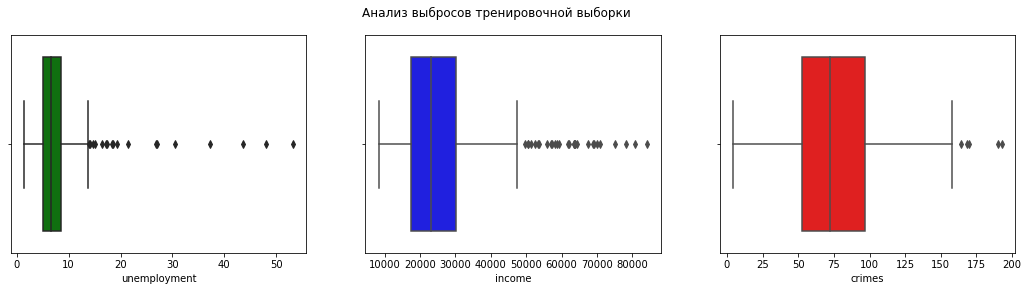

In [24]:
# Посмотрим выбросы
fig, axs = plt.subplots(1, 3, figsize=(18,4))

plt.suptitle('Анализ выбросов тренировочной выборки')
sns.boxplot(data['unemployment'], color='green', ax=axs[0])
sns.boxplot(data['income'], color='blue', ax=axs[1])
sns.boxplot(data['crimes'], color='red', ax=axs[2])
plt.show()

In [25]:
# Напишем функцию для определения минимальных и максимальных границ нормальных значений через межквартильный размах
def set_limit(data, column, type_limit):
    # расчёт межквартильного размаха
    quart = data[column].quantile(.75) - data[column].quantile(.25)
    if type_limit == 'low':
        return data[column].quantile(.25) - quart * 1.5
    elif type_limit == 'high':
        return data[column].quantile(.75) + quart * 1.5

In [26]:
# Найдем эти границы
max_unemployment = set_limit(data, 'unemployment', 'high')
min_unemployment = set_limit(data, 'unemployment', 'low')

max_income = set_limit(data, 'income', 'high')
min_income = set_limit(data, 'income', 'low')

max_crimes = set_limit(data, 'crimes', 'high')
min_crimes = set_limit(data, 'crimes', 'low')

In [27]:
# Посмотрим выбросы по преступности
data.loc[data['crimes'] > max_crimes]

,year,region,unemployment,income,thefts,robbery,brigandage,crimes_ec,crimes
18,2009,Иркутская область,10.8,18504.0,128.66,36.07,4.86,26.20,169.59
49,2009,Пермский край,9.9,15079.0,151.50,34.90,3.44,28.50,189.84
73,2009,Хабаровский край,10.2,21062.0,138.73,27.72,2.24,36.52,168.69
180,2013,Забайкальский край,10.5,25901.0,149.95,11.76,2.72,19.62,164.43
385,2017,Республика Тыва,18.3,28928.0,171.59,18.90,2.23,6.75,192.72


3 из 5 выбросов приходится на 2009 год, думаю это связано с высоким показателем грабежей по России в тот год. Проверим статистику по грабежам и увидим, что действительно в 2009 был самый большой показатель грабежей. Данные районы выпадают за пределы нормальных значений, но не слишком сильно.  
В целом эти высокие показатели преступности относятся к югу Сибирского и Дальневосточного федеральных округов, которые в целом имеют высокий уровень бедности и высокий уровень преступности (выше 75 процентиля).

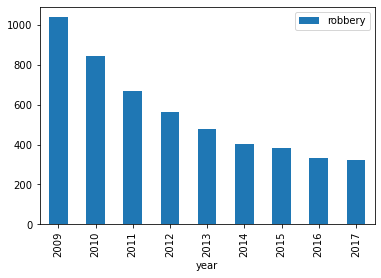

In [28]:
# Построим сводную таблицу и график количества грабежей по всем грабежам по России. 
rob_pivot = robbery[robbery['year']>2008].pivot_table(index = 'year', values = 'robbery', aggfunc = 'sum')
rob_pivot.plot(kind = 'bar')
plt.show()

In [29]:
# Посмотрим связаны ли данные регионы с безработицей.
# Список интересующих нас регионов
res_col = set(data.loc[data['crimes'] > max_crimes]['region'])
res_col

{'Забайкальский край',
 'Иркутская область',
 'Пермский край',
 'Республика Тыва',
 'Хабаровский край'}

In [30]:
# Проверим входит ли регион с выбросами по преступности в наблюдения с выбросами по безработице
data.loc[(data['unemployment'] > max_unemployment) & (data['region'].isin(res_col))]

,year,region,unemployment,income,thefts,robbery,brigandage,crimes_ec,crimes
54,2009,Республика Тыва,21.4,14559.0,50.83,10.74,2.49,28.66,64.06
136,2011,Республика Тыва,17.3,16917.0,53.09,11.03,2.08,6.49,66.20
219,2013,Республика Тыва,19.3,22974.0,71.73,9.66,2.67,4.67,84.06
302,2015,Республика Тыва,18.6,25664.0,111.48,9.82,2.29,5.35,123.59
385,2017,Республика Тыва,18.3,28928.0,171.59,18.90,2.23,6.75,192.72


При проверке выяснилось, что только в республике Тыва за 2017 выбросы преступности связаны с высоким показателем безработицы, что имеет самый высокий показатель преступности в собранной статистике. Заметим, что в целом по республике Тыва прослеживаются сверхкритичный уровень безработицы. И сама республика считается одной из самых криминальных в России.

In [31]:
# Посмотрим на Забайкальский край
data[data['region'] == 'Забайкальский край']

,year,region,unemployment,income,thefts,robbery,brigandage,crimes_ec,crimes
15,2009,Забайкальский край,12.0,16752.0,114.47,15.72,2.98,34.87,133.17
97,2011,Забайкальский край,10.6,18623.0,128.91,13.23,2.56,13.44,144.70
180,2013,Забайкальский край,10.5,25901.0,149.95,11.76,2.72,19.62,164.43
263,2015,Забайкальский край,10.4,29786.0,146.87,8.72,1.96,11.01,157.55
346,2017,Забайкальский край,10.7,33370.0,111.55,6.86,1.13,8.69,119.54


In [32]:
# 75 процентиль статистики преступлений по регионам Росиии
data['crimes'].quantile(.75)

96.81

Забайкальский край в целом имеет высокий уровень преступности. 

In [33]:
# Cформируем "хорошую" выборку без выбросов
data = data.query('@max_unemployment > unemployment > @min_unemployment &' 
                                   '@max_income > income > @min_income &'
                                   '@max_crimes > crimes > @min_crimes'
                                  )
data

,year,region,unemployment,income,thefts,robbery,brigandage,crimes_ec,crimes
0,2009,Адыгея,7.7,10798.0,41.13,5.53,0.66,15.77,47.32
1,2009,Алтайский край,12.3,10741.0,98.36,14.35,1.30,15.02,114.01
2,2009,Амурская область,8.3,17969.0,101.22,15.77,2.04,19.17,119.03
3,2009,Архангельская область,7.2,17654.0,93.00,13.34,2.15,28.30,108.49
4,2009,Астраханская область,9.9,14011.0,76.76,14.32,2.44,102.89,93.52
...,...,...,...,...,...,...,...,...,...
404,2017,Хабаровский край,4.9,44182.0,75.56,5.54,0.61,6.14,81.71
405,2017,Хакасия,4.9,33629.0,86.52,4.80,0.52,5.23,91.84
407,2017,Челябинская область,6.6,32759.0,74.64,7.92,0.99,7.89,83.55
409,2017,Чувашия,5.1,24315.0,28.80,2.73,0.27,8.35,31.80


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 413
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          363 non-null    int64  
 1   region        363 non-null    object 
 2   unemployment  363 non-null    float64
 3   income        363 non-null    float64
 4   thefts        363 non-null    float64
 5   robbery       363 non-null    float64
 6   brigandage    363 non-null    float64
 7   crimes_ec     363 non-null    float64
 8   crimes        363 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 28.4+ KB


### Обучение

**Подготовим признаки и целевую переменную**

In [35]:
# Выделим независимые переменные как признаки для обучения и целевую переменную
features = ['unemployment', 'income']
target = 'crimes'

In [36]:
# Отмасштабируем признаки
scaler = StandardScaler()
scaler.fit(data[features])
data[features] = scaler.transform(data[features])

<AxesSubplot:>

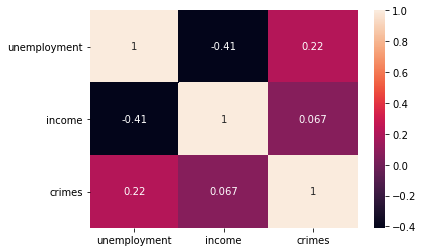

In [37]:
# Посмотрим на корреляцию
sns.heatmap(data[['unemployment', 'income', 'crimes']].corr(), annot= True)

Имеем низкую корреляцию наших признаков с целевой переменной.

In [38]:
# Определим размер обучающей выборки (70%/30%)
train_size = int(data.shape[0]*0.7)

In [39]:
# Определим размер обучающей и тестовой выборок через срезы
data_train = data[:train_size]
data_test = data[train_size:]

In [40]:
# Определим обучающую и тестовые выборки 
X_train = data_train[features]
y_train = data_train[target]

X_test = data_test[features]
y_test = data_test[target]

**Напишем вспомогательные функции**

In [41]:
# Напишем функцию вывода метрик
def print_metrics(y_test, y_test_predict, model_name):
    mae = metrics.mean_absolute_error(y_test, y_test_predict)
    rmse = metrics.mean_squared_error(y_test, y_test_predict, squared = False)
    r2_test = metrics.r2_score(y_test, y_test_predict)
    print(f'MAE {model_name} на тестовой выборке: {mae:.2f}')
    print(f'RMSE {model_name} на тестовой выборке: {rmse:.2f}')
    print(f'R2 {model_name} на тестовой выборке: {r2_test:.3f}')

In [42]:
# Напишем функцию, оображающую важность признаков
def show_feature_importance(model_name, feature_importance, feature_names):
    feat_imp = pd.DataFrame({'feature_importance':feature_importance}, feature_names)
    feat_imp.sort_values(by='feature_importance', ascending=True).plot(kind='barh', 
                        figsize=(10, len(feature_importance) * 0.4))
    plt.xlabel(model_name + ' feature_importance')
    plt.gca().legend_ = None

In [43]:
# Напишем функцию, строящую диаграмму рассеивания истинных значений и предсказанных на тренировочной и тестовой выборках
def plot_y_true_vs_y_pred(y_train, y_test, y_train_pred, y_test_predict, model_name):
    plt.figure(figsize=(16, 6))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.xlabel(f'Предсказание модели "{model_name}"')
    plt.ylabel('Истинные значения')
    plt.xlim(y_train.min() - y_train.mean() // 3, y_train.max() + y_train.mean() // 3)
    plt.ylim(y_train.min() - y_train.mean() // 3, y_train.max() + y_train.mean() // 3)
    sns.scatterplot(y_train_predict, y_train, alpha=0.5, color='red', label='Train Data')
    sns.scatterplot(y_test_predict, y_test, alpha=0.5, color='blue', label='Test Data')
    plt.legend
    plt.title(model_name)

**Построим модель Линейной Регрессии**

In [44]:
model_name = 'Linear Regression Baseline'
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print_metrics(y_test, y_test_predict, model_name)

MAE Linear Regression Baseline на тестовой выборке: 26.27
RMSE Linear Regression Baseline на тестовой выборке: 32.30
R2 Linear Regression Baseline на тестовой выборке: -0.727


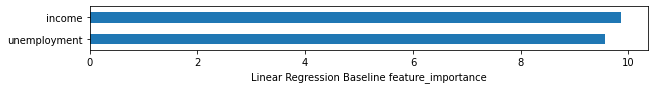

In [45]:
show_feature_importance(model_name, linreg.coef_, X_train.columns)

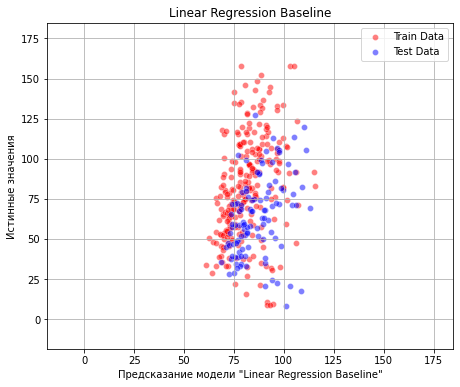

In [46]:
plot_y_true_vs_y_pred(y_train, y_test, y_train_predict, y_test_predict, model_name)

Получили довольно большие абсолютные ошибки и плохой коэффициент детерминации. Данная модель работает плохо. Теорию Беккера на этих данных c этой моделью мы не пожем подтвердить.  
Попробуем подобрать другие признаки, чтобы построить модель предсказания предступности. Возьмем уровень бедности, качество жизни и продажи крепкого алкоголя в регионе.

## 2. User Model

In [47]:
# Данные по качеству жизни 
# Столбец 'life_quality' содержит рейтинг (индекс качества жизни «РИА Рейтинг»)
life = pd.read_csv('datasets/life.csv')
life.columns =  ['year', 'region', 'life_quality']

*Рейтинг построен на основе комплексного учета различных параметров, характеризующих качество жизни в регионах. При расчете проанализированы 67 показателей, которые объединены в 11 групп: уровень доходов населения, занятость и рынок труда, жилищные условия, безопасность проживания, демографическая ситуация, экологические и климатические условия, здоровье и уровень образования, обеспеченность объектами социальной инфраструктуры, уровень экономического развития, уровень развития малого бизнеса, освоенность территории и развитие транспортной инфраструктуры. Рейтинговый балл изменяется в диапазоне от 1 до 100*

In [48]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          849 non-null    int64  
 1   region        849 non-null    object 
 2   life_quality  841 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.0+ KB


In [49]:
# Данные по бедности 
# Столбец 'poverty' содержит численность населения с денежными доходами ниже величины регионального прожиточного минимума
poverty = pd.read_csv('datasets/poverty.csv')
poverty.columns =  ['year', 'region', 'poverty']

In [50]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     2209 non-null   int64  
 1   region   2209 non-null   object 
 2   poverty  1885 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 51.9+ KB


In [51]:
# Данные по алкоголю
# Столбец 'vodka' содержит продажи водки в литрах в год на душу населения
vodka = pd.read_csv('datasets/vodka.csv')
vodka.columns = ['year', 'region', 'vodka']

In [52]:
vodka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1614 non-null   int64  
 1   region  1614 non-null   object 
 2   vodka   1553 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 38.0+ KB


In [53]:
# Cоединим наши датасеты в один по году и региону
data = data.merge(life, on = ['year' , 'region'])
data = data.merge(poverty, on = ['year' , 'region'])
data = data.merge(vodka, on = ['year' , 'region'])

# Удалим пропуски
data = data.dropna()
data.head()

,year,region,unemployment,income,thefts,robbery,brigandage,crimes_ec,crimes,life_quality,poverty,vodka
0,2013,Адыгея,0.445435,-0.608840,30.40,1.94,0.38,13.50,32.72,40.66,12.0,4.7
1,2013,Алтайский край,0.619158,-0.707276,79.79,5.30,0.53,6.70,85.62,36.40,17.6,8.7
2,2013,Амурская область,-0.336319,0.650906,95.26,9.83,1.63,4.36,106.72,35.15,15.1,10.2
3,2013,Архангельская область,-0.336319,0.660281,82.30,8.23,1.21,8.99,91.74,36.85,13.9,14.4
4,2013,Астраханская область,0.271712,-0.269588,53.98,5.84,1.08,13.49,60.90,40.91,12.0,7.3


In [54]:
# Найдем границы нормальных значений
max_life_quality = set_limit(data, 'life_quality', 'high')
min_life_quality = set_limit(data, 'life_quality', 'low')

max_poverty = set_limit(data, 'poverty', 'high')
min_poverty = set_limit(data, 'poverty', 'low')

max_vodka = set_limit(data, 'vodka', 'high')
min_vodka = set_limit(data, 'vodka', 'low')

max_crimes = set_limit(data, 'crimes', 'high')
min_crimes = set_limit(data, 'crimes', 'low')

In [55]:
# Cформируем "хорошую" выборку без выбросов
data = data.query('@max_life_quality > life_quality > @min_life_quality &' 
                                   '@max_poverty > poverty > @min_poverty &'
                                   '@max_crimes > crimes > @min_crimes &'
                                   '@max_vodka > vodka > @min_vodka'
                                  )
data

,year,region,unemployment,income,thefts,robbery,brigandage,crimes_ec,crimes,life_quality,poverty,vodka
0,2013,Адыгея,0.445435,-0.608840,30.40,1.94,0.38,13.50,32.72,40.66,12.0,4.7
1,2013,Алтайский край,0.619158,-0.707276,79.79,5.30,0.53,6.70,85.62,36.40,17.6,8.7
2,2013,Амурская область,-0.336319,0.650906,95.26,9.83,1.63,4.36,106.72,35.15,15.1,10.2
3,2013,Архангельская область,-0.336319,0.660281,82.30,8.23,1.21,8.99,91.74,36.85,13.9,14.4
4,2013,Астраханская область,0.271712,-0.269588,53.98,5.84,1.08,13.49,60.90,40.91,12.0,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...
136,2015,Хабаровский край,-0.683765,1.798037,103.74,8.22,1.14,7.20,113.10,44.85,13.7,11.1
137,2015,Хакасия,-0.466612,0.689226,120.55,5.80,0.82,6.83,127.17,36.02,17.7,4.7
138,2015,Челябинская область,0.054558,0.545322,88.75,7.55,1.19,6.44,97.49,52.69,13.8,4.4
139,2015,Чувашия,-0.814058,-0.267713,42.36,3.56,0.54,8.34,46.46,44.80,17.8,8.2


### Обучение

In [56]:
# Выделим дополнительные независимые переменные как признаки для обучения и целевую переменную
features_new = ['life_quality', 'poverty', 'vodka']
target = 'crimes'

In [57]:
scaler = StandardScaler()
scaler.fit(data[features_new])
data[features_new] = scaler.transform(data[features_new])

In [58]:
features.extend(features_new)

In [59]:
features

['unemployment', 'income', 'life_quality', 'poverty', 'vodka']

<AxesSubplot:>

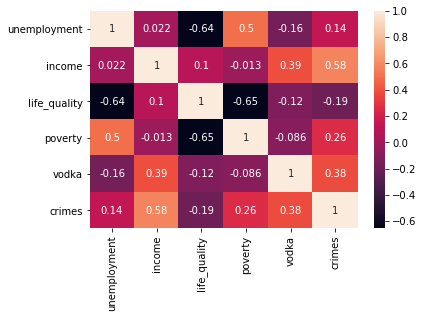

In [60]:
sns.heatmap(data[features+['crimes']].corr(), annot= True)

Имеем небольшую корреляцию дохода и продажи водки с преступностью.

In [61]:
# Определим размер обучающей выборки
train_size = int(data.shape[0]*0.7)

In [62]:
# Определим размер обучающей и тестовой выборок через срезы
data_train = data[:train_size]
data_test = data[train_size:]

In [63]:
# Определим обучающую и тестовые выборки 
X_train = data_train[features]
y_train = data_train[target]

X_test = data_test[features]
y_test = data_test[target]

**Построим модель Линейной Регрессии**

In [64]:
model_name = 'Linear Regression User Model'

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print_metrics(y_test, y_test_predict, model_name)

MAE Linear Regression User Model на тестовой выборке: 17.00
RMSE Linear Regression User Model на тестовой выборке: 21.62
R2 Linear Regression User Model на тестовой выборке: 0.298


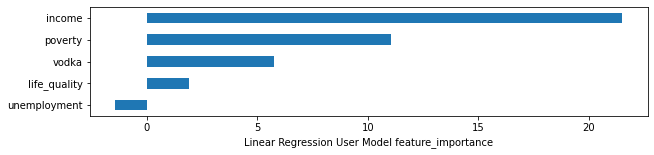

In [65]:
show_feature_importance(model_name, linreg.coef_, X_train.columns)

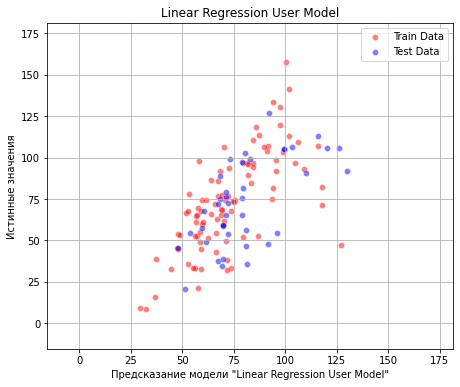

In [66]:
plot_y_true_vs_y_pred(y_train, y_test, y_train_predict, y_test_predict, model_name)

Данная линейная модель работает лучше чем Baseline. Больше всего выражена зависимость от продажи водки в регионе, в меньшей степени от бедности населения.

**Построим модель Random Forest**

In [67]:
# Воспользуемся GridSearch для поиска гиперпараметров
rf = RandomForestRegressor(random_state=42)
forest_params = {'n_estimators':[50, 100, 400],
                'max_depth': [10, 15, 20]
}

best_forest = GridSearchCV(rf, forest_params, scoring='r2', 
                           cv=5, n_jobs=-1, verbose=True)

best_forest.fit(X_train, y_train)

best_forest.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'max_depth': 10, 'n_estimators': 400}

In [75]:
# Построим модель случайного леса с лучшими параметрами
rf = RandomForestRegressor(n_estimators=400, max_depth=10, n_jobs=-1, random_state=42)

rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print_metrics(y_test, y_test_predict, "Random Forest User Model")

MAE Random Forest User Model на тестовой выборке: 13.76
RMSE Random Forest User Model на тестовой выборке: 18.08
R2 Random Forest User Model на тестовой выборке: 0.509


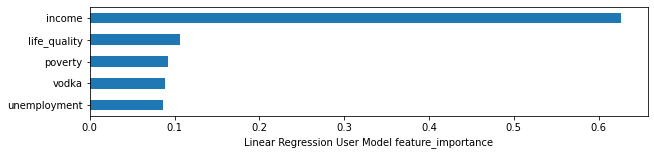

In [69]:
show_feature_importance(model_name, rf.feature_importances_, X_train.columns)

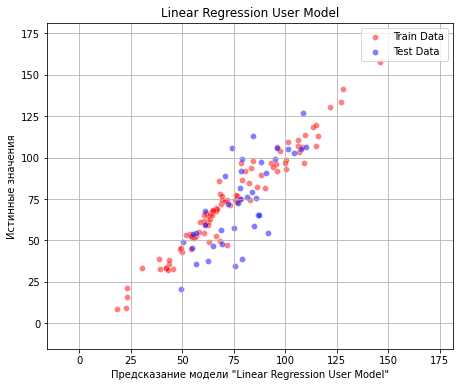

In [70]:
plot_y_true_vs_y_pred(y_train, y_test, y_train_predict, y_test_predict, model_name)

Качество модели у случайного леса с настройкой гиперпараметров получилось выше, чем у линейной регрессии. Важными признаками для леса являются зарплаты населения и безработица, что в частности может являться обоснованием теории Беккера в комплексе c другими признаками.

**Построим модель XGboost Regression**

In [71]:
model_name = 'XGboost Regression User Model'
xgb_reg = XGBRegressor(random_state=42)

xgb_params = {
                'learning_rate' : np.arange(0.01, 0.2, 0.01),
                'max_depth' : range(2,3),
                'n_estimators': range(100,701,100)         
}

best_xgb = GridSearchCV(xgb_reg, xgb_params, scoring='r2', 
                           cv=5, n_jobs=-1, verbose=True)

best_xgb.fit(X_train, y_train)
print(best_xgb.best_params_)


xgb_test_pred = best_xgb.best_estimator_.predict(X_test)

print_metrics(y_test, xgb_test_pred, model_name)

Fitting 5 folds for each of 133 candidates, totalling 665 fits
{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 400}
MAE XGboost Regression User Model на тестовой выборке: 14.23
RMSE XGboost Regression User Model на тестовой выборке: 18.10
R2 XGboost Regression User Model на тестовой выборке: 0.508


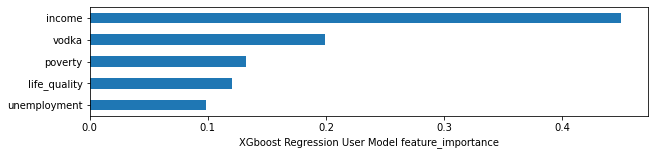

In [72]:
show_feature_importance(model_name, best_xgb.best_estimator_.feature_importances_, X_train.columns)

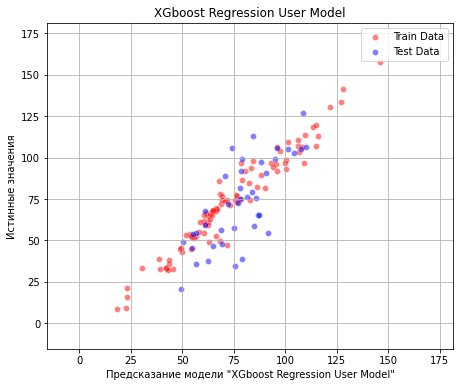

In [73]:
plot_y_true_vs_y_pred(y_train, y_test, y_train_predict, y_test_predict, model_name)

XGBoost показал результат хуже чем случайный лес, думаю можно немножко улучшить более тщательным подбором гиперпараметров. Здесь наиболее важными признаками являются деньги (зарплаты и процент бедных людей).

Модели показали, что существует некоторая зависимость преступности от доходов и безработицы, на дополнительных данных и других признаках можно построить более качественную модель.